In [1]:
import random
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display

import matplotlib.pyplot as plt

from tqdm.auto import tqdm

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings(action='ignore') 

In [17]:
CFG = {
    'SR':16000,
    'N_MFCC':50, # MFCC 벡터를 추출할 개수
    'SEED':41
}
sound_name = "00012.wav"
audio_path = 'C:/Users/CJ/Desktop/MultiCampus/프로젝트_2_ai서비스 개발/data/open/train/' + sound_name
sample_rate=CFG["SR"]

wav, x= librosa.load(audio_path,sample_rate)

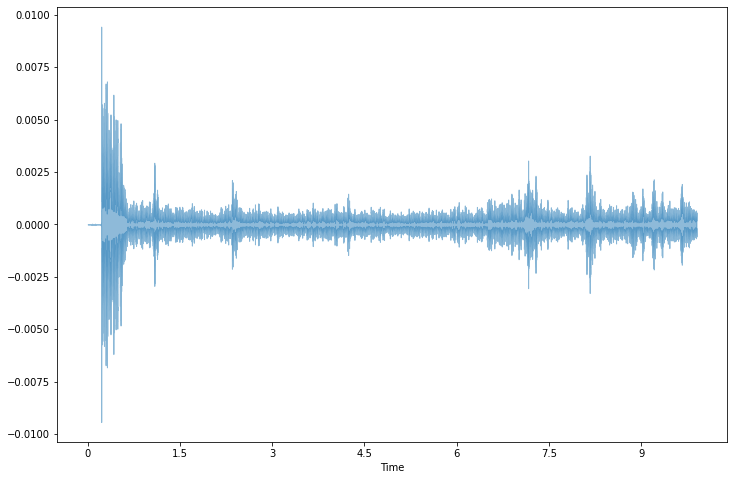

In [18]:
plt.figure(figsize=(12,8))
librosa.display.waveshow(wav,x, alpha = 0.5)

In [33]:
def is_data_silence(data, threshold):
    filteredList = list(filter(lambda x : x >= threshold,data))
    if filteredList == []:
        return True
    else :
        return False

In [40]:
def aud_load(f_path):
    global path_name
    return librosa.load(path_name+"/"+f_path, sr = 16000)

In [41]:
is_data_silence(wav, 0.01)

False

In [ ]:
import os
path_name = "C:/Users/CJ/Desktop/MultiCampus/프로젝트_2_ai서비스 개발/data/open/train"
lst = os.listdir(path_name)
audio_lst = []
for name in lst:
    wav, x = aud_load(name)
    audio_lst.append([wav, x])
audio_lst

In [43]:
del_lst = []
cnt = 1
for wav, x in audio_lst:
    if is_data_silence(wav, 0.3):
        del_lst.append(cnt)
    cnt+=1


In [46]:
print(del_lst)

[10, 12, 22, 23, 45, 48, 68, 70, 102, 110, 120, 128, 140, 148, 159, 173, 177, 219, 220, 223, 263, 284, 287, 289, 300, 303, 305, 331, 357, 362, 368, 378, 384, 398, 406, 440, 446, 467, 496, 501, 512, 518, 519, 534, 543, 553, 556, 559, 560, 566, 567, 570, 608, 609, 623, 626, 634, 635, 641, 644, 657, 663, 680, 681, 684, 690, 693, 697, 720, 736, 753, 764, 783, 788, 795, 796, 827, 837, 838, 852, 858, 868, 881, 882, 886, 889, 895, 900, 901, 908, 910, 919, 941, 944, 945, 963, 964, 974, 975, 982, 998, 1001, 1012, 1027, 1052, 1064, 1075, 1087, 1103, 1108, 1110, 1111, 1131, 1132, 1141, 1144, 1158, 1163, 1183, 1184, 1188, 1191, 1197, 1205, 1210, 1224, 1237, 1245, 1249, 1253, 1267, 1288, 1318, 1320, 1333, 1335, 1337, 1344, 1347, 1360, 1377, 1413, 1421, 1432, 1439, 1443, 1444, 1451, 1461, 1463, 1470, 1485, 1488, 1515, 1524, 1530, 1534, 1538, 1544, 1567, 1573, 1578, 1589, 1594, 1604, 1610, 1635, 1673, 1685, 1701, 1721, 1722, 1723, 1724, 1745, 1746, 1750, 1764, 1774, 1776, 1786, 1807, 1808, 1811, 1830

In [65]:
df = pd.read_csv('C:/Users/CJ/Desktop/MultiCampus/프로젝트_2_ai서비스 개발/data/open/train_data.csv')
df[df["id"].isin(del_lst) & df["covid19"] == 1]

,id,age,gender,respiratory_condition,fever_or_muscle_pain,covid19
22,23,31,female,1,0,1
127,128,38,male,1,1,1
176,177,42,male,0,0,1
330,331,40,male,1,0,1
533,534,32,male,0,1,1
552,553,34,male,0,0,1
565,566,47,male,0,0,1
633,634,28,female,0,0,1
683,684,51,male,1,1,1
719,720,25,male,1,1,1


In [80]:
wav, x = librosa.load("../data/open/train/02110.wav")
librosa.display.waveshow((wav + wav.mean()) * 1/max(np.abs(wav)), x, alpha = 0.5)


6.207692692642229

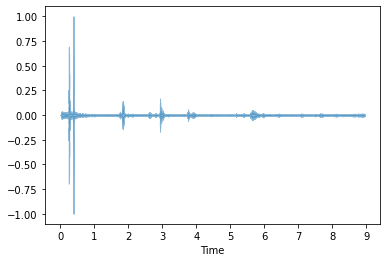

In [78]:
(wav + wav.mean()) * 1/max(np.abs(wav))

array([-5.041266e-07, -5.041266e-07, -5.041266e-07, ..., -5.041266e-07,
       -5.041266e-07, -5.041266e-07], dtype=float32)